In [19]:
from days_statistics import DaysStatistics
from data_helper import DataHelper
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib._color_data as mcd
%matplotlib inline

In [2]:
dh = DataHelper()

In [3]:
def prepare_plot(size=(16,9), ax=None, y_max=250, every_hour=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=size)

    ax.set_xlim(60, 276)
    ax.set_ylim(0, y_max)

    ax.yaxis.set_major_locator(MultipleLocator(50))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    
    if every_hour:
        ax.xaxis.set_major_locator(MultipleLocator(12))
        ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    else:
        ax.xaxis.set_major_locator(MultipleLocator(24))
        ax.xaxis.set_minor_locator(AutoMinorLocator(9))
    
    # Turn grid on for both major and minor ticks and style minor slightly
    # differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    ax.set_xlabel('Time [hour:minute]', fontsize=14)
    ax.set_ylabel('Pool attendance', fontsize=14)
    return ax

In [4]:
def plot_attandace_vs(data, column):
    values = data[column].unique()
    if len(values) > 10:
        print('Too many values to plot. Consider clustering. Number of unique values for %s is %d'%(column, len(values)))
        return
   
    bad_dates = ['2018-02-20','2018-06-05','2018-06-06','2018-06-07','2018-06-08','2018-06-11',
                 '2018-06-12','2018-06-13','2018-06-14','2018-09-05','2018-03-17','2018-05-05',
                 '2018-06-10','2018-12-01']
    values.sort()
    histogram = dict()
    n = dict()
    
    for value in values:
        histogram[value] = [0]*288
        n[value] = [0]*288

    for index, row in data.iterrows():
        ts = datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S')
        slot_id = (ts.hour*12) + int(ts.minute/5)
        if row['day_of_week'] < 9 and row['pool'] > 0 and ts.strftime('%Y-%m-%d') not in bad_dates:
#             if row[column] > 4 and slot_id < 120:
#                 print(row['pool'], row['time'])
            histogram[row[column]][slot_id] += row['pool']
            n[row[column]][slot_id] += 1
    
    for value in values:
        for index, slot in enumerate(histogram[value]):
            if n[value][index] > 0:
                histogram[value][index] = histogram[value][index] / n[value][index]

    return histogram

df = pd.read_csv(dh.csv_path)
histogram = plot_attandace_vs(df, 'day_of_week')

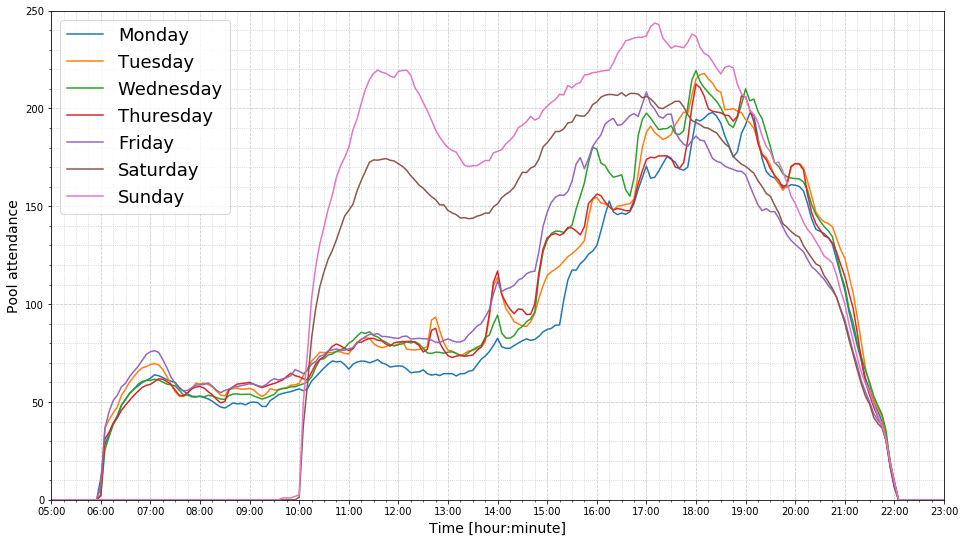

In [5]:
a = datetime(2000, 1, 1, 23, 55, 0, 342380)
y = []
for i in range(288):
    a = a + timedelta(minutes=5)
    y.append(a.strftime('%H:%M'))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thuresday', 'Friday', 'Saturday', 'Sunday']
n_start = 60
n_stop = 275
ax = prepare_plot()
for i, key in enumerate(histogram.keys()):
    ax.plot(y, histogram[key], label=days[i])

ax.legend(prop={'size': 18})
# plt.show()    
plt.savefig('averages.png', dpi=300, bbox_inches='tight')

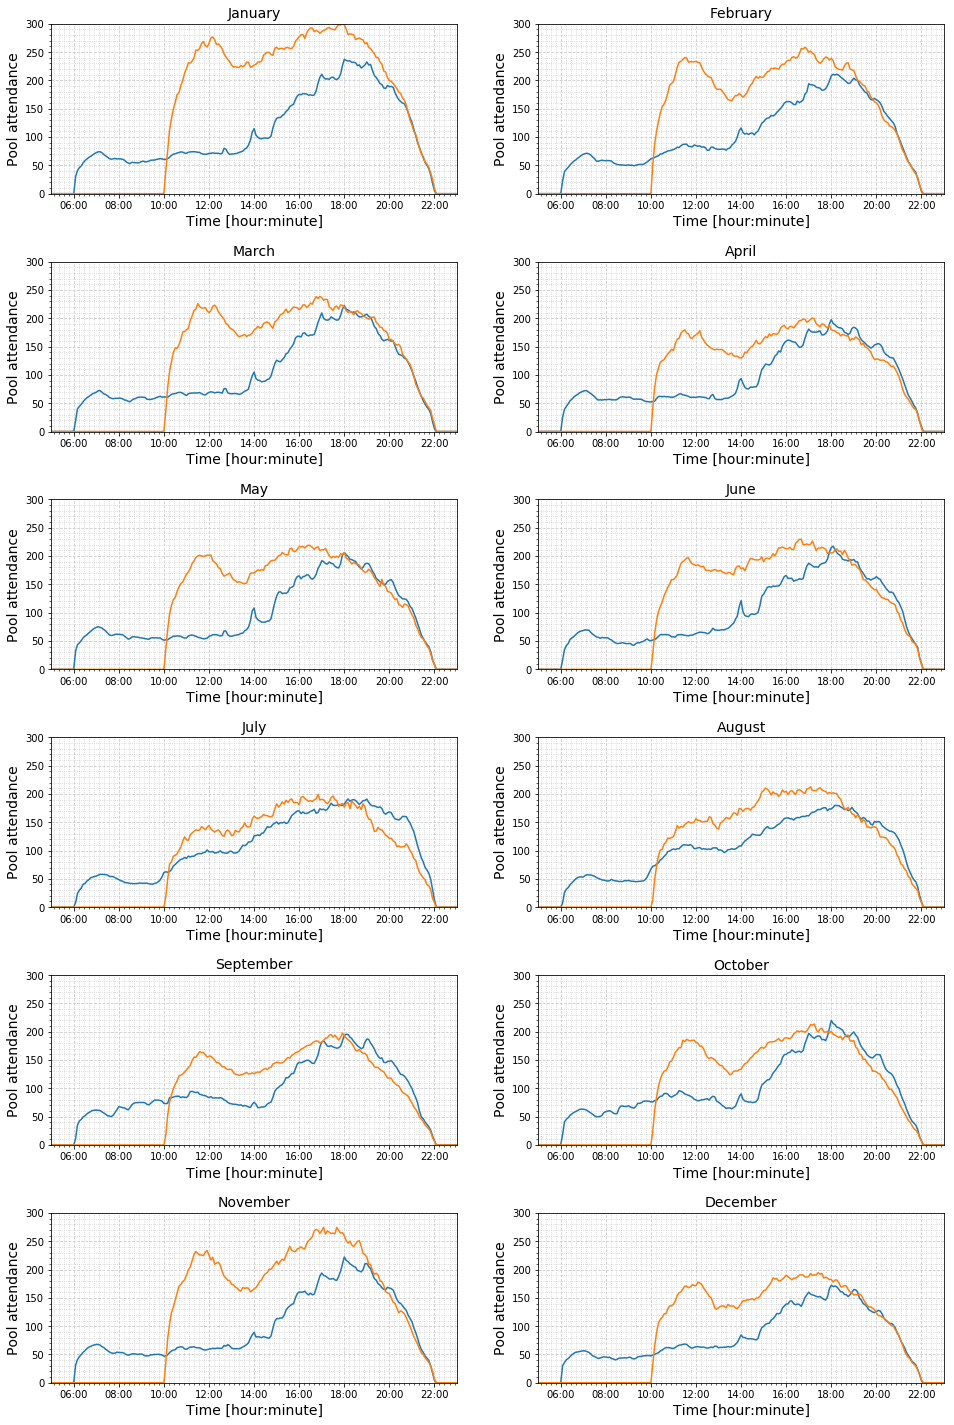

In [11]:
ds = DaysStatistics()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axs = plt.subplots(6, 2, figsize=(16,25), gridspec_kw={'hspace': 0.4})
column = 0
row = 0
for i in range(12):
    data = ds.get_average_for_month(i, False)   
    data_weekend = ds.get_average_for_month(i, True) 
    prepare_plot((8,3), axs[row, column], 300, False)
    axs[row, column].set_title(months[i], fontsize=14)
    l1 = axs[row, column].plot(y, data)
    l2 = axs[row, column].plot(y, data_weekend)
    column += 1
    if column > 1:
        column = 0
        row += 1
plt.savefig('monthly_averages.png', dpi=300, bbox_inches='tight')

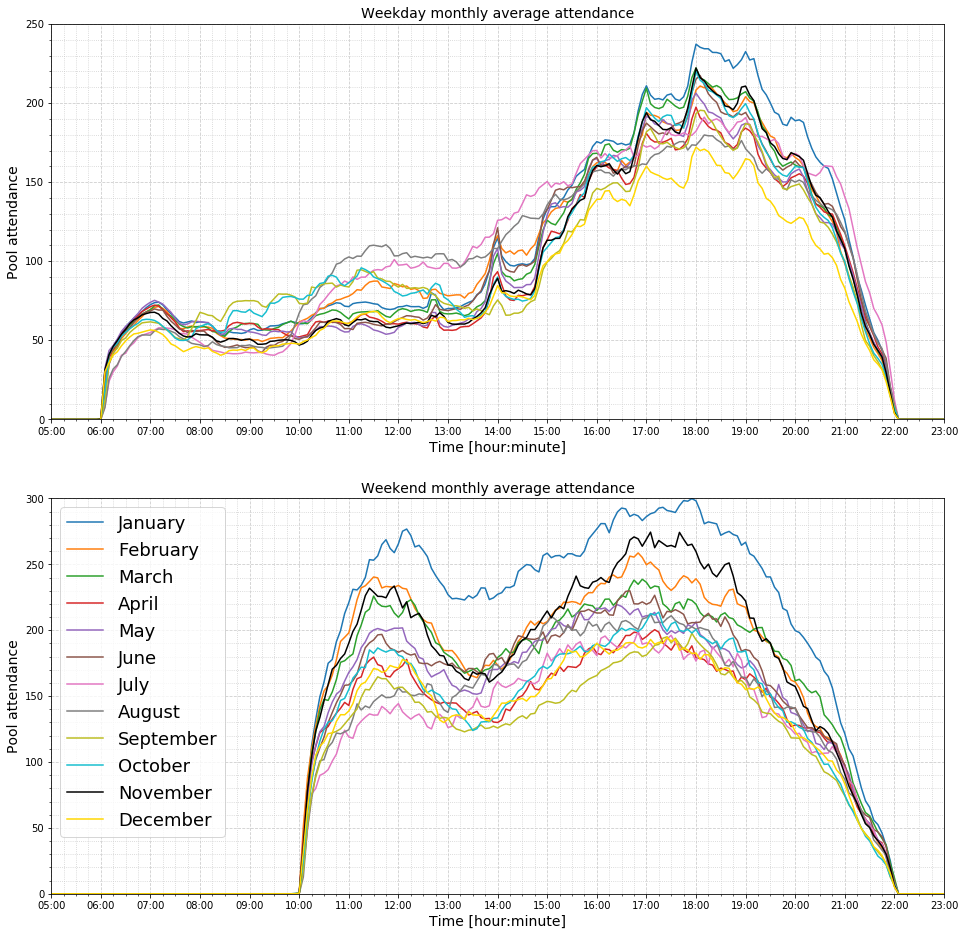

In [34]:
ds = DaysStatistics()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#000000','#FFD700']

fig, axs = plt.subplots(2, 1, figsize=(16,16))
ax_weekday = prepare_plot((16,7), axs[0])
ax_weekday.set_title('Weekday monthly average attendance', fontsize=14)
ax_weekend = prepare_plot((16,9), axs[1], 300)
ax_weekend.set_title('Weekend monthly average attendance', fontsize=14)

for i in range(12):
    data = ds.get_average_for_month(i, False)   
    data_weekend = ds.get_average_for_month(i, True) 
    
    ax_weekday.plot(y, data, color=colors[i])
    ax_weekend.plot(y, data_weekend, color=colors[i], label=months[i])

ax_weekend.legend(prop={'size': 18})
plt.savefig('monthly_averages_together.png', dpi=300, bbox_inches='tight')

In [29]:
mcd.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3